In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [7]:
from tensorflow.keras.datasets import cifar10

In [11]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [13]:
X_train=X_train/255
X_test=X_test/255
y_train_cat=to_categorical(y_train,num_classes=10)
y_test_cat=to_categorical(y_test,num_classes=10)

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
Dmodel=Sequential()
Dmodel.add(Input(shape=(32,32,3)))
Dmodel.add(Flatten())
Dmodel.add(Dense(256,activation='relu'))
Dmodel.add(Dense(128,activation='relu'))
Dmodel.add(Dense(64,activation='relu'))
Dmodel.add(Dense(10,activation='softmax'))

Dmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
history=Dmodel.fit(X_train,y_train_cat,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2592 - loss: 2.0102 - val_accuracy: 0.3686 - val_loss: 1.7636
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3679 - loss: 1.7399 - val_accuracy: 0.3914 - val_loss: 1.6995
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4032 - loss: 1.6573 - val_accuracy: 0.4190 - val_loss: 1.6310
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4251 - loss: 1.6042 - val_accuracy: 0.4304 - val_loss: 1.6081
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4439 - loss: 1.5439 - val_accuracy: 0.4377 - val_loss: 1.5818


In [31]:
loss,acc=Dmodel.evaluate(X_test,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4607 - loss: 1.5332


In [33]:
print(loss)
print(acc)

1.5337915420532227
0.4553000032901764


In [47]:
losses=pd.DataFrame(history.history)

In [49]:
Dmodel.history.history

{'accuracy': [0.30742499232292175,
  0.37622499465942383,
  0.4095250070095062,
  0.42822501063346863,
  0.44495001435279846],
 'loss': [1.895529866218567,
  1.723662257194519,
  1.6458797454833984,
  1.5936106443405151,
  1.5443572998046875],
 'val_accuracy': [0.3686000108718872,
  0.391400009393692,
  0.4189999997615814,
  0.430400013923645,
  0.4377000033855438],
 'val_loss': [1.7636045217514038,
  1.6994907855987549,
  1.6309504508972168,
  1.6080678701400757,
  1.5817896127700806]}

<Axes: >

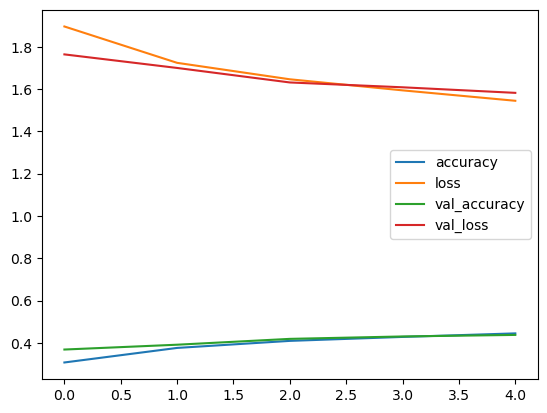

In [51]:
losses.plot()

In [53]:
#vgg19
from tensorflow.keras.applications import VGG19

In [79]:
vgg19model=VGG19(weights='imagenet',include_top=False,input_shape=(68,68,3))
for layer in vgg19model.layers:
    layer.trainable=False

In [59]:
from tensorflow.keras.datasets import mnist

In [101]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [103]:
X_train=np.pad(X_train,((0,0),(10,10),(10,10)),mode='constant',constant_values=255)
X_test=np.pad(X_test,((0,0),(10,10),(10,10)),mode='constant',constant_values=255)
X_train=np.stack([X_train]*3,axis=-1)
X_test=np.stack([X_test]*3,axis=-1)

In [67]:
y_train_cat=to_categorical(y_train,num_classes=10)
y_test_cat=to_categorical(y_test,num_classes=10)

In [71]:
X_train.shape

(60000, 68, 68, 3)

In [81]:
Vmodel=Sequential()
Vmodel.add(vgg19model)
Vmodel.add(Flatten())
Vmodel.add(Dense(units=128,activation='relu'))
Vmodel.add(Dense(units=10,activation='softmax'))

In [83]:
Vmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
Vmodel.fit(X_train,y_train_cat,epochs=3,validation_split=0.2)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 302s 201ms/step - accuracy: 0.7721 - loss: 0.7866 - val_accuracy: 0.9178 - val_loss: 0.2533
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 317s 211ms/step - accuracy: 0.9071 - loss: 0.2843 - val_accuracy: 0.9208 - val_loss: 0.2532
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 323s 215ms/step - accuracy: 0.9196 - loss: 0.2446 - val_accuracy: 0.9273 - val_loss: 0.2172


In [89]:
loss=pd.DataFrame(Vmodel.history.history)

<Axes: >

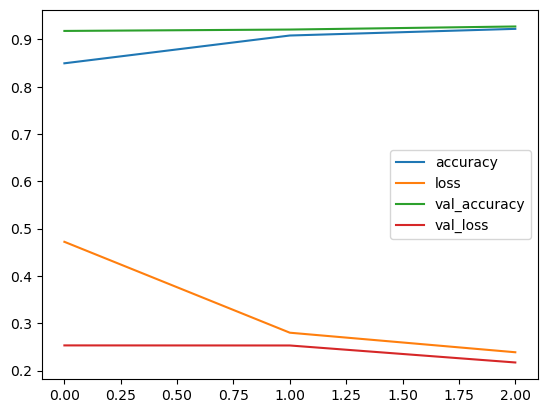

In [91]:
loss.plot()

In [95]:
pred=Vmodel.predict(X_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "vgg19" is incompatible with the layer: expected shape=(None, 68, 68, 3), found shape=(32, 48, 48, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 48, 48, 3), dtype=uint8)
  • training=False
  • mask=None

In [107]:
X_train.shape

(60000, 48, 48, 3)

In [109]:
X_test=np.pad(X_test,((0,0),(10,10),(10,10)),mode='constant',constant_values=255)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (3,2)  and requested shape (4,2)